## Uber Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar
%matplotlib inline

### Load data

In [2]:
file = './resources/data_1/uber_drives.csv'
df = pd.read_csv(file, parse_dates = ['START_DATE*', 'END_DATE*'])
print(df.shape)
df.head()

(1156, 7)


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


### Check for missing values

In [3]:
z = df.isnull().sum()
print(z[z > 0])

END_DATE*      1
CATEGORY*      1
START*         1
STOP*          1
PURPOSE*     503
dtype: int64


### Let's drop the rows with missing values

In [4]:
data = df.copy()
data = data.dropna()
z = data.isnull().sum()
print(z[z > 0])

Series([], dtype: int64)


### Check Data type of each column

In [5]:
print(data.dtypes)

START_DATE*            object
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object


**For whatever reason pandas did not parse the `START_DATE` column as date. It's probably due to the way the column was enetered. We therefore still have to format the column as date...**

In [6]:
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], format = '%m/%d/%Y %H:%M')
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], format = '%m/%d/%Y %H:%M')

In [7]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [8]:
print(data.dtypes)

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object


### Let's create some features we shall need...

In [9]:
data['hour'] = data['START_DATE*'].map(lambda x: x.hour)
data['day'] = data['START_DATE*'].map(lambda x: x.day)
data['dayofweek'] = data['START_DATE*'].map(lambda x: x.dayofweek)
data['month'] = data['START_DATE*'].map(lambda x: x.month)
data['weekday'] = [calendar.day_name[i] for i in data['dayofweek'].values]

In [10]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,hour,day,dayofweek,month,weekday
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


**Let's convert all column names to lower case and remove any special charater...**

In [11]:
data.columns = [name.replace('*', '').lower() for name in data.columns]

In [12]:
data.head()

,start_date,end_date,category,start,stop,miles,purpose,hour,day,dayofweek,month,weekday
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


### How many Categories do we have?

In [13]:
print(data.category.value_counts())

Business    647
Personal      6
Name: category, dtype: int64


### How long do people travel with uber?

In [14]:
print(data.miles.value_counts())

9.9      26
3.1      21
10.4     17
3.0      13
6.1      13
         ..
28.8      1
201.0     1
310.3     1
23.0      1
48.2      1
Name: miles, Length: 205, dtype: int64


### Let's visualize the distribution of the travelled distances

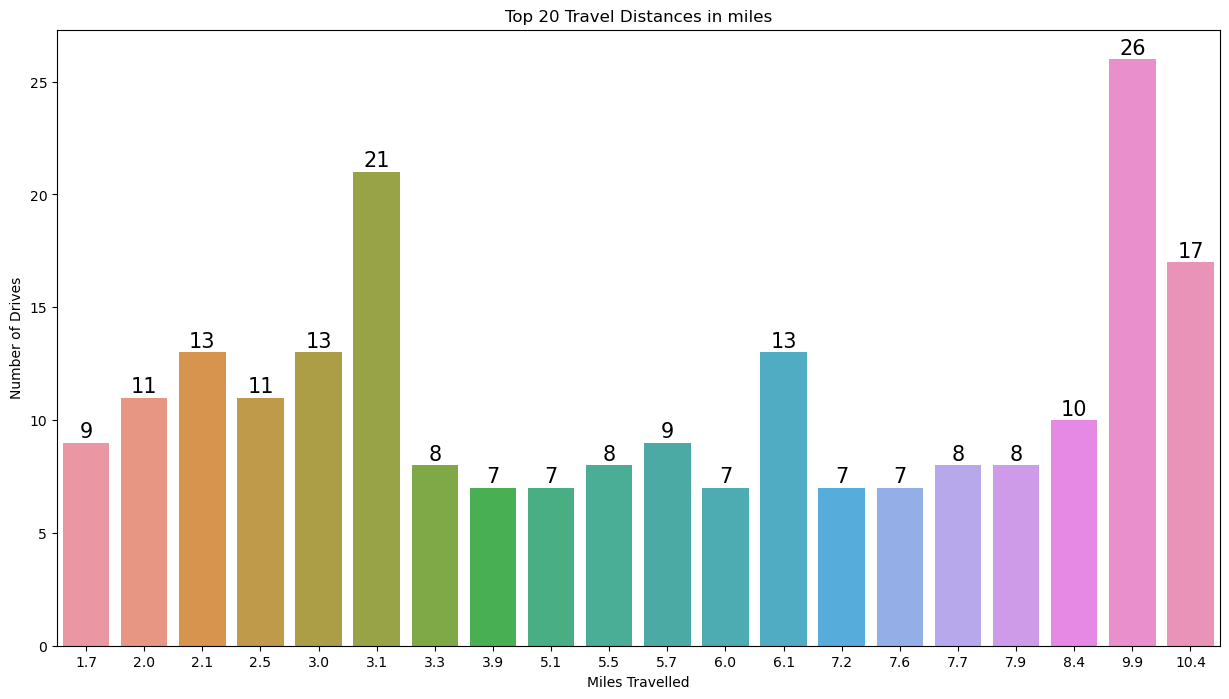

In [15]:
top20_distances = data.miles.value_counts().head(20)

plt.figure(figsize = (15,8))
plots = sns.barplot(x = top20_distances.index, y = top20_distances.values)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),    
                   ha = 'center', va = 'center',
                   size = 15, xytext = (0, 8),
                   textcoords = 'offset points')
plt.title('Top 20 Travel Distances in miles')
plt.xlabel('Miles Travelled')
plt.ylabel('Number of Drives')
plt.show()

### Bottom 20 travelled distances

In [16]:
print(data.miles.value_counts().tail(20))

22.5     1
13.6     1
15.2     1
13.7     1
15.3     1
15.9     1
18.6     1
19.1     1
159.3    1
174.2    1
80.5     1
77.3     1
20.3     1
16.4     1
16.1     1
28.8     1
201.0    1
310.3    1
23.0     1
48.2     1
Name: miles, dtype: int64


### Let's check the most busy hours
During which time of day do people book uber the most?

In [17]:
print(data.hour.value_counts())

13    55
14    52
17    51
15    51
18    51
16    45
20    45
12    43
11    39
19    35
21    34
10    33
9     26
23    21
22    21
8     17
0     13
7      8
1      4
3      3
5      3
6      2
2      1
Name: hour, dtype: int64


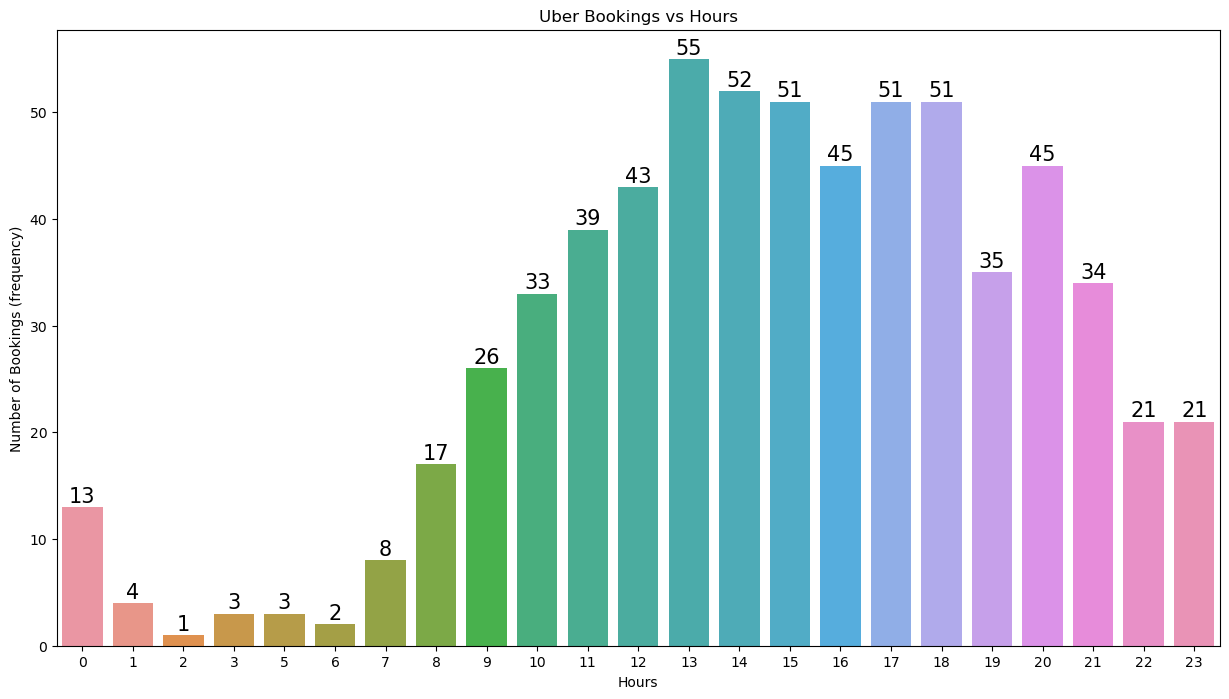

In [18]:
plt.figure(figsize = (15,8))
plots = sns.barplot(x = data.hour.value_counts().index, y = data.hour.value_counts().values)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),    
                   ha = 'center', va = 'center',
                   size = 15, xytext = (0, 8),
                   textcoords = 'offset points')
plt.title('Uber Bookings vs Hours')
plt.xlabel('Hours')
plt.ylabel('Number of Bookings (frequency)')
plt.show()

It can be seen that **peak hours** is between **`13 O'clock`** or **`1 pm`** and **`18 O'clock`** or **`6 pm`**. While the early hours of the day from **midnight** to **`8 O'clock`** are the **least busiest hours**! 
### Purpose of Trips

In [19]:
print(data.purpose.value_counts())

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: purpose, dtype: int64


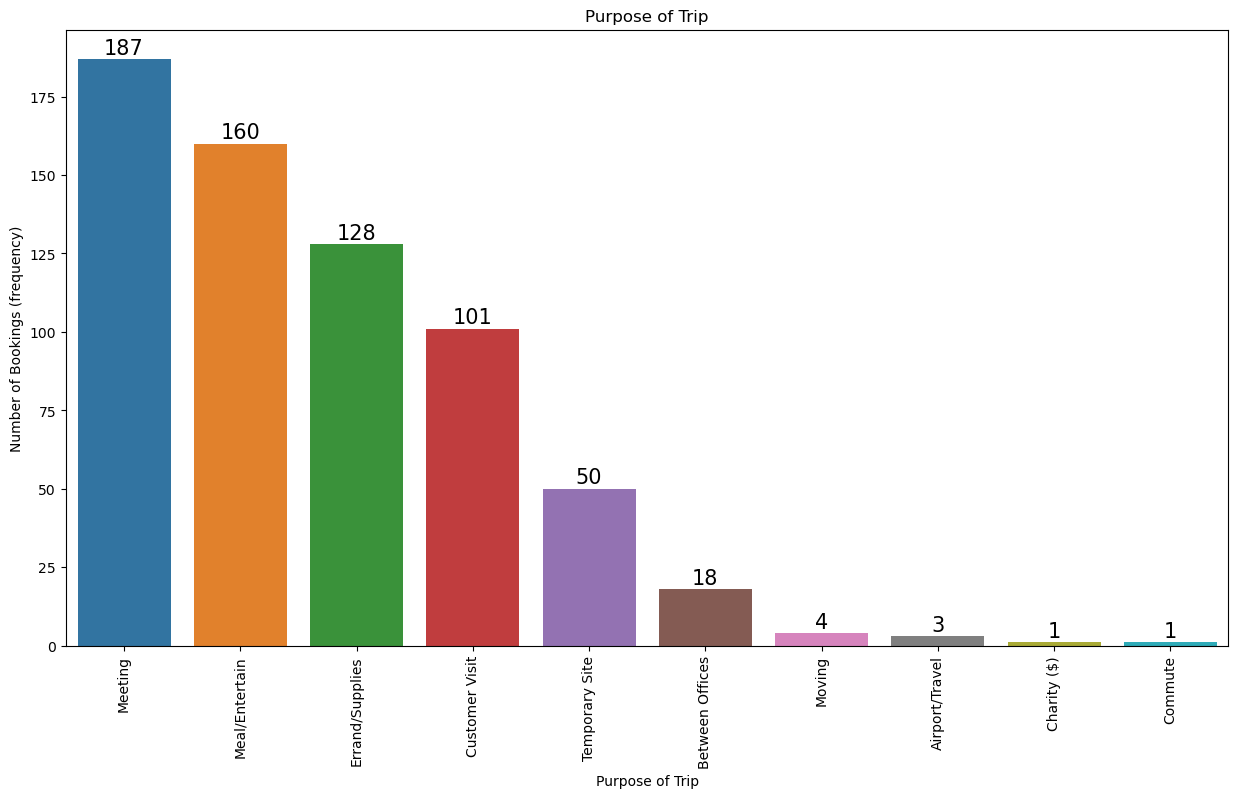

In [20]:
plt.figure(figsize = (15,8))
plots = sns.barplot(x = data.purpose.value_counts().index, y = data.purpose.value_counts().values)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),    
                   ha = 'center', va = 'center',
                   size = 15, xytext = (0, 8),
                   textcoords = 'offset points')
plt.title('Purpose of Trip')
plt.xlabel('Purpose of Trip')
plt.ylabel('Number of Bookings (frequency)')
plt.xticks(rotation = 90)
plt.show()

The data reveals that most people book Uber to attend **meetings** while **airport travel** is surprisingly very low!.
### Which week day is busiest?

In [21]:
print(data.weekday.value_counts())

Friday       125
Tuesday       94
Thursday      92
Sunday        87
Monday        87
Wednesday     85
Saturday      83
Name: weekday, dtype: int64


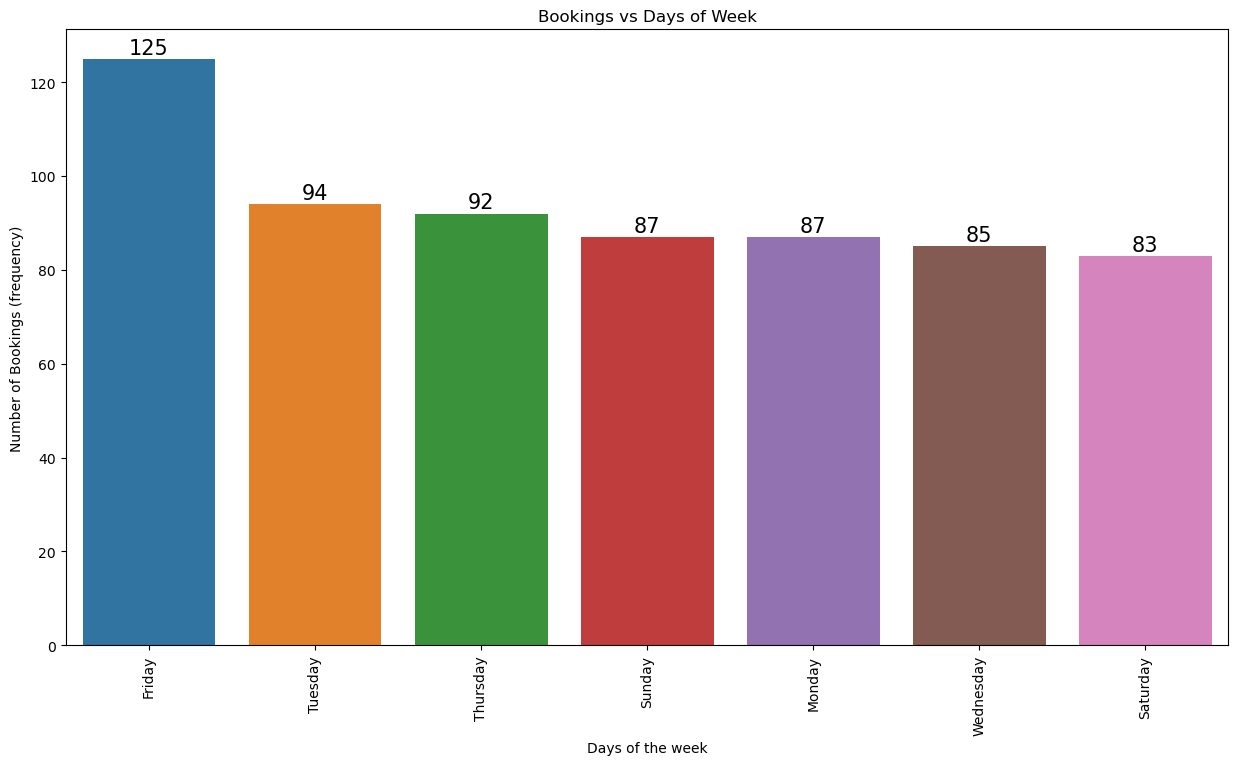

In [22]:
plt.figure(figsize = (15,8))
plots = sns.barplot(x = data.weekday.value_counts().index, y = data.weekday.value_counts().values)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),    
                   ha = 'center', va = 'center',
                   size = 15, xytext = (0, 8),
                   textcoords = 'offset points')
plt.title('Bookings vs Days of Week')
plt.xlabel('Days of the week')
plt.ylabel('Number of Bookings (frequency)')
plt.xticks(rotation = 90)
plt.show()

**Fridays** is the most **busiest of the week day** while the rest of the days is pretty much similar in terms of number of bookings.

### Booking distribution per calendar day

In [23]:
print(data.day.value_counts())

21    31
29    30
19    30
18    30
4     28
28    27
12    27
8     25
1     25
22    24
7     23
20    22
6     22
14    21
11    21
5     21
3     20
26    20
27    20
25    19
10    19
2     18
24    18
13    17
15    16
17    16
16    15
23    14
30    12
9     12
31    10
Name: day, dtype: int64


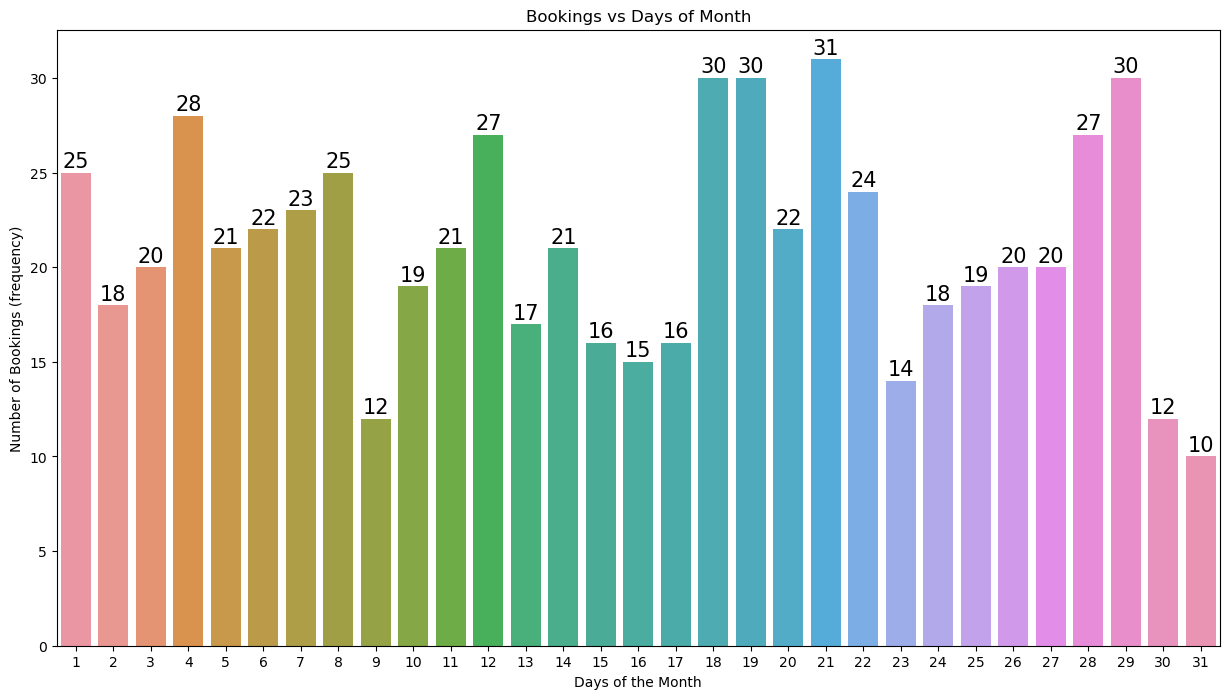

In [24]:
plt.figure(figsize = (15,8))
plots = sns.barplot(x = data.day.value_counts().index, y = data.day.value_counts().values)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),    
                   ha = 'center', va = 'center',
                   size = 15, xytext = (0, 8),
                   textcoords = 'offset points')
plt.title('Bookings vs Days of Month')
plt.xlabel('Days of the Month')
plt.ylabel('Number of Bookings (frequency)')
#plt.xticks(rotation = 90)
plt.show()

The booking distributions per calendar days shows **no noticeable pattern**. However, it should be noted almost half of the data was dropped due to missing data. Maybe with sufficient data this distribution might be relevant.

### Monthly Distribution of Bookings

In [25]:
data['month_name'] = [calendar.month_name[i] for i in data['month'].values]

In [26]:
print(data.month_name.value_counts())

December    134
February     82
June         73
March        71
November     60
January      59
April        50
May          46
July         46
October      20
August       12
Name: month_name, dtype: int64


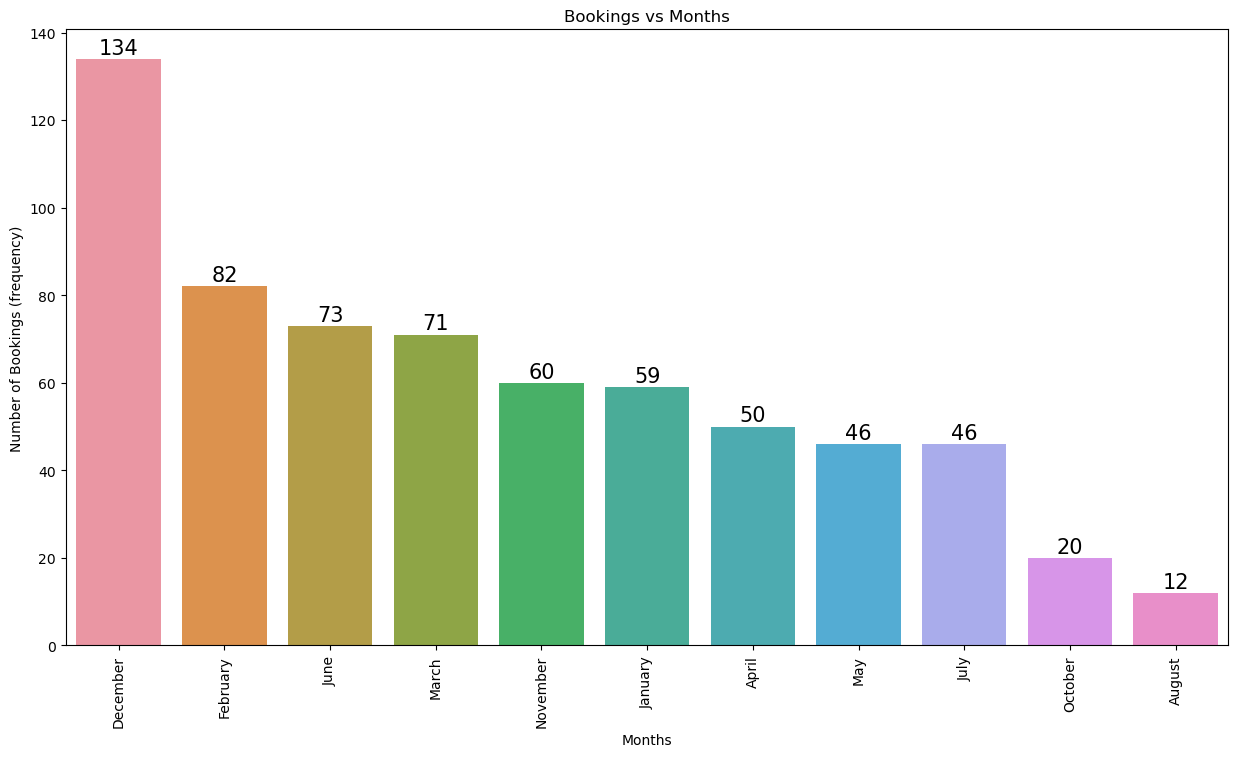

In [27]:
plt.figure(figsize = (15,8))
plots = sns.barplot(x = data.month_name.value_counts().index, y = data.month_name.value_counts().values)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),    
                   ha = 'center', va = 'center',
                   size = 15, xytext = (0, 8),
                   textcoords = 'offset points')
plt.title('Bookings vs Months')
plt.xlabel('Months')
plt.ylabel('Number of Bookings (frequency)')
plt.xticks(rotation = 90)
plt.show()

The month of **December** is the most festive month of the year with Christmas and it's understandably the most booked month! **August** is the most calm month of the year in terms of bookings.

### Where do most people start their trips?

In [28]:
print(data.start.value_counts())

Cary                161
Unknown Location     55
Morrisville          54
Whitebridge          36
Durham               30
                   ... 
Lower Manhattan       1
Lake Reams            1
Latta                 1
Briar Meadow          1
Gampaha               1
Name: start, Length: 131, dtype: int64


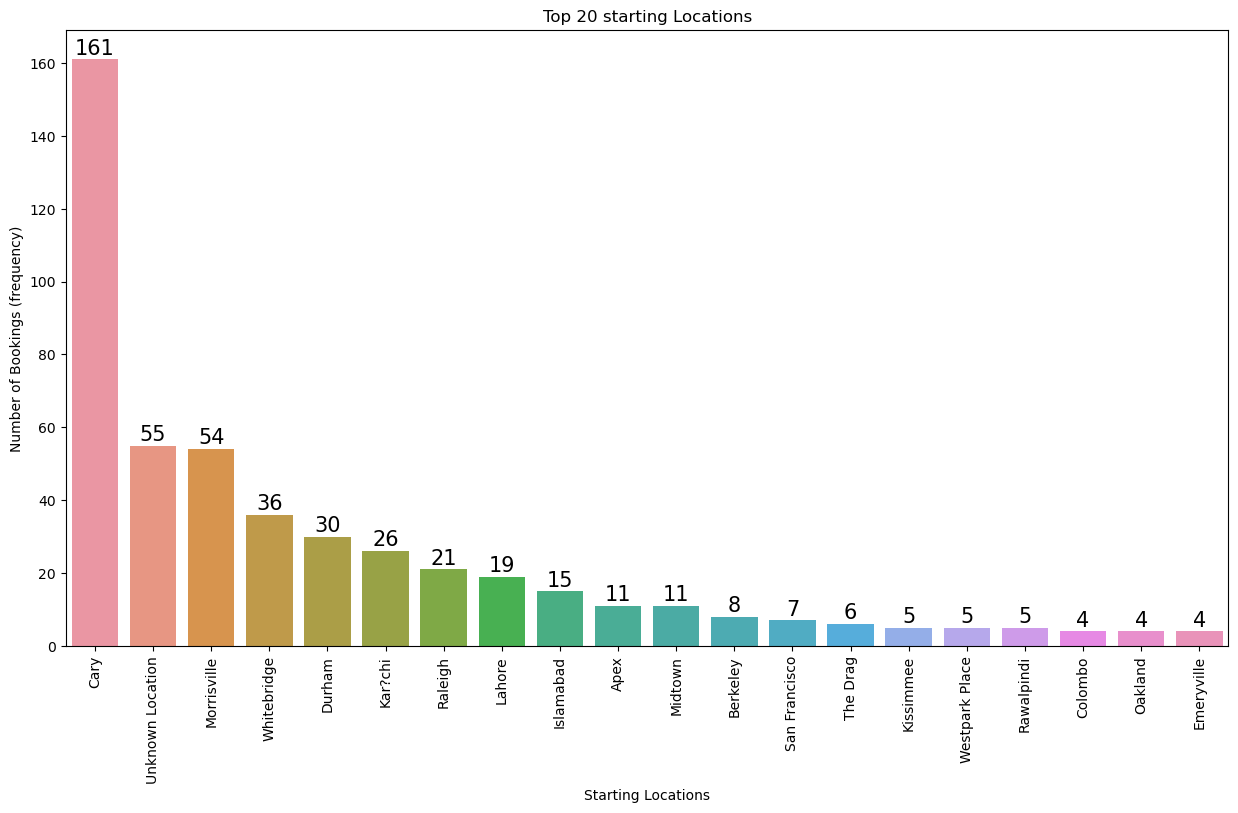

In [29]:
plt.figure(figsize = (15,8))
plots = sns.barplot(x = data.start.value_counts().head(20).index, y = data.start.value_counts().head(20).values)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),    
                   ha = 'center', va = 'center',
                   size = 15, xytext = (0, 8),
                   textcoords = 'offset points')
plt.title('Top 20 starting Locations')
plt.xlabel('Starting Locations')
plt.ylabel('Number of Bookings (frequency)')
plt.xticks(rotation = 90)
plt.show()

**Cary** stands out as the location where most people start their trips! This suggests that **the company Uber should place most of their vehicles in this location**! This might be a train/bus station.

### Where do most people end their trips?

In [31]:
print(data.stop.value_counts())

Cary                155
Morrisville          60
Unknown Location     56
Whitebridge          37
Durham               30
                   ... 
Cedar Hill            1
Florence              1
Ridgeland             1
Daytona Beach         1
Ilukwatta             1
Name: stop, Length: 137, dtype: int64


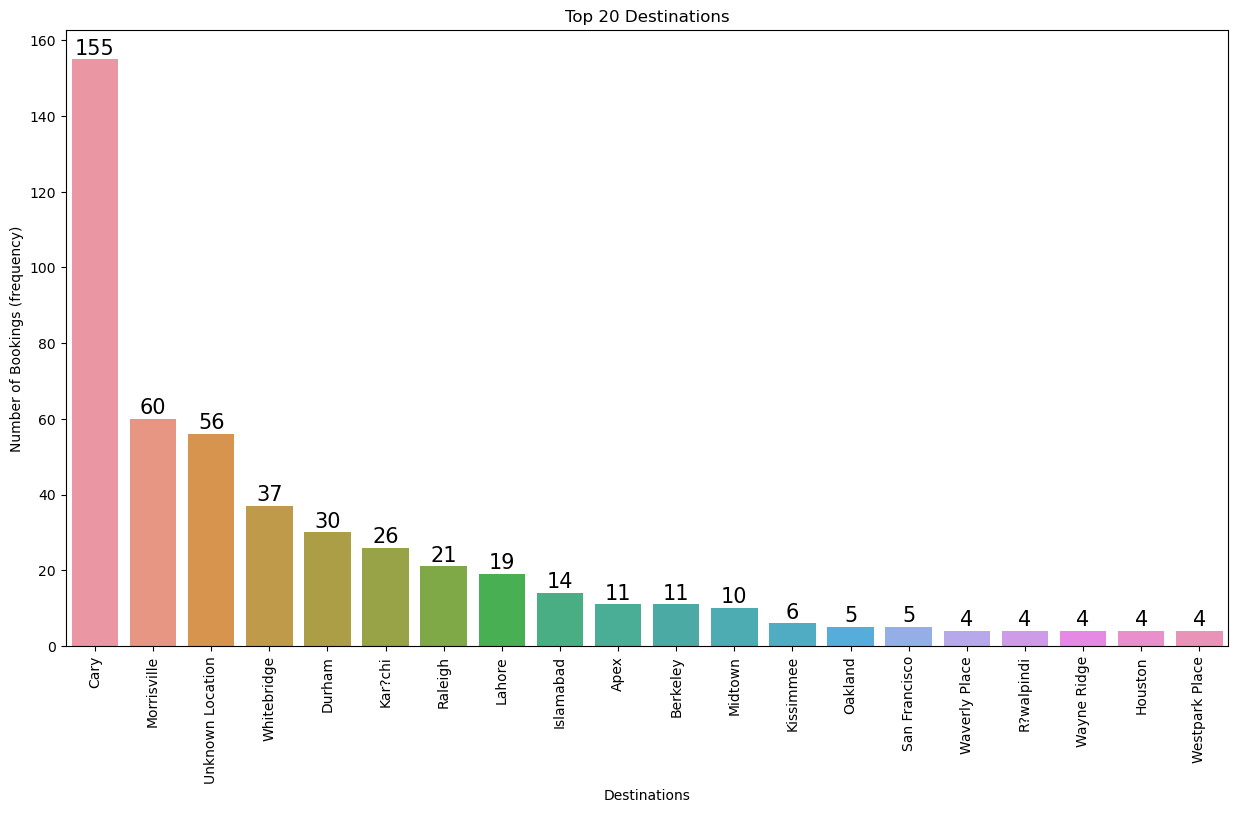

In [32]:
plt.figure(figsize = (15,8))
plots = sns.barplot(x = data.stop.value_counts().head(20).index, y = data.stop.value_counts().head(20).values)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),    
                   ha = 'center', va = 'center',
                   size = 15, xytext = (0, 8),
                   textcoords = 'offset points')
plt.title('Top 20 Destinations')
plt.xlabel('Destinations')
plt.ylabel('Number of Bookings (frequency)')
plt.xticks(rotation = 90)
plt.show()